In [ ]:
#Author: Wei Xiong
#Date: Feb 24, 2021
#Paper: Increased ranking change in wheat breeding under climate change
#Plots: Figure 1 - IWIN sites not included in the script
#       Figure 2 - Real change of crossover occurrence 
#       Figure 3 - Comparison between real and modeled crossover occurrence
#       Figure 4 - Contribution of climate change and breeding progress

In [1]:
#This script is for crossover paper that will be sumbiited to Nature Plant. The paper had been rejected by NCC
#!/Urs/bin/python
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D 
import math
import statsmodels.api as sm
import scipy
%matplotlib inline

In [2]:
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import statsmodels.api as sm

In [3]:
#Windows
base_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\1.0_Cross_Over\\"
in_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\1.0_Cross_Over\\"
data_out="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\1.0_Cross_Over\\2_Results\\NP_data\\"#P1_Figure_1\\"
plot_out="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\1.0_Cross_Over\\6_Figures\\NP_Plots\\"
weat_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\Weather\\ARC5\\"  #Metblue
#Mac:
#base_dir="/Users/weixiong/Dropbox (RSG)/Works/CurrentProcessing/Wheat_Phenotypic/1_Cross_Over/"
#in_dir=base_dir+"1_Data/"
#os.chdir(base_dir+"6_Figures/NCC_Plot1")#P1_Figure_1/"
#weat_dir="/Users/weixiong/Dropbox (RSG)/Works/CurrentProcessing/Wheat_Phenotypic/Weather/Output/"
nursery=['ESWYT','IDYN','HTWYT','SAWYT','IWWYT_IRR','IWWYT_SA']
per=['sea','veg','rep','gfi']

# Result 1 - Real change of crossover occurrence

In [80]:
#Calcaute GEI and Cross_over number
#gei=pd.DataFrame(columns=['nursery','year','G','Gn','E','En','GxE','GxEn'])
cross_over=pd.DataFrame(columns=['nursery','year','cross-over-n','nline'])
for n in nursery:
    df=pd.read_csv(base_dir+"/1_Data/"+n+"_yld.csv")
    for yr in df['year'].unique():
        # Generating the SS Table
        df0=df[df['year']==yr]
        df0.loc[:,'G!']=df0['sid'].astype('str')+'_'+df0['gen']
        if (n in ['IWWYT_IRR','IWWYT_SA']):
            df0.loc[:,'E!']=df0['loc']
            df0=df0.drop('occ',1)
        else:
            df0.loc[:,'E!']=df0['occ'].astype('str')+'_'+df0['loc'].astype('str')
        df0=df0.replace(r'^\s+$', np.nan, regex=True)
        df0=df0.dropna()
        df0.loc[:,'yld']=df0['yld'].astype('float')
        df0=df0[['G!','E!','yld']].groupby(['G!','E!']).mean().reset_index()
        #Generating cross-over table
        yld=df0.pivot_table(index='G!',columns='E!',values='yld').reset_index()
        if yld.shape[1]>3:
            yld=np.asarray(yld.iloc[:,1:])
            fit=[]
            for i in range(yld.shape[0]):
                df_temp=pd.DataFrame()
                df_temp['yld']=yld[i,:]
                df_temp['mean']=np.nanmean(yld,axis=0)
                df_temp=df_temp.dropna()
                X_opt = np.asarray(df_temp['mean'])
                X_opt=sm.add_constant(X_opt)
                y=np.asarray(df_temp['yld'])
                OLS = sm.OLS(endog = y, exog = X_opt).fit()
                fit=fit+[OLS.params.tolist()]
            cross=pd.DataFrame()
            gen=np.asarray([[i,j] for i in range(len(fit)-1) for j in range(i+1,len(fit))])
            cross['a1']=[fit[i][1] for i in gen[:,0]] 
            cross['b1']=[fit[i][0] for i in gen[:,0]]
            cross['a2']=[fit[i][1] for i in gen[:,1]] 
            cross['b2']=[fit[i][0] for i in gen[:,1]]
            cross['r']=(cross['b2']-cross['b1'])/(cross['a1']-cross['a2'])
            cross['cross']=[1 if (x>min(np.nanmean(yld,axis=0)))&(x<max(np.nanmean(yld,axis=0))) else 0 for x in cross['r']]
            cross_over.loc[len(cross_over),:]=[n,yr,np.nansum(cross['cross']),len(df0['G!'].unique())]
cross_over.to_csv(data_out+"real_cross-over.csv",index=False)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


# Fig #1

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


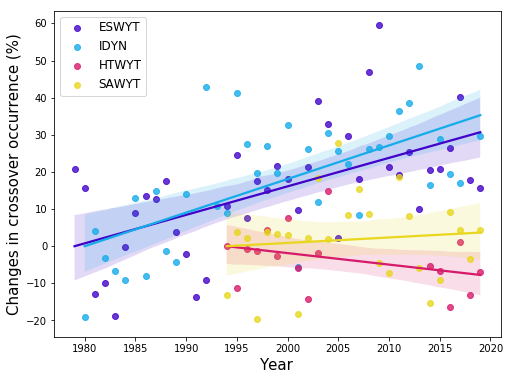

In [11]:
nursery=['ESWYT','IDYN','HTWYT','SAWYT']
colors=['#4203c9', '#16acea', '#d71b6b', '#e8d71e']
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(8,6))

#fig.savefig("S13_FWcrossover.png",dpi=300,bbox_inches = 'tight')
df=pd.read_csv(data_out+"real_cross-over.csv")
#df=cross_over
change=[]
for n in range(4): #Add IDYN is because the last line always too long
    df1=df[df['nursery']==nursery[n]]
    if n>1:
        df1=df1[df['year']!=1992]
    df1['cross']=df1['cross-over-n']/(df1['nline']*(df1['nline']-1)/2)#
    x=df1.year
    y=df1.cross
    X_opt = np.asarray(x)
    X_opt=sm.add_constant(X_opt)
    y=np.asarray(y)
    OLS = sm.OLS(endog = y, exog = X_opt).fit()
    baseyld=OLS.params[0]+OLS.params[1]*min(x)
    y=100*(df1.cross-baseyld)/baseyld
    sns.regplot(x,y,marker='o',ax=ax,label=nursery[n],color=colors[n],truncate=True)

handles, labels = ax.get_legend_handles_labels()
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('Changes in crossover occurrence (%)',fontsize=15)
plt.legend(handles,labels,loc='upper left',fontsize=12)

fig.savefig(plot_out+"Fig1_realCrossover.png",dpi=300,bbox_inches = 'tight')

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


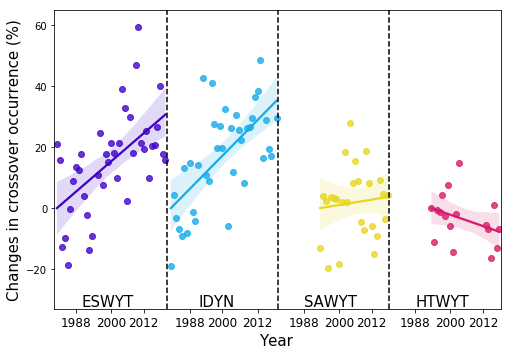

In [4]:

nursery=['ESWYT','IDYN','SAWYT','HTWYT']
colors=['#4203c9', '#16acea', '#e8d71e', '#d71b6b']
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(8,5.5))

#fig.savefig("S13_FWcrossover.png",dpi=300,bbox_inches = 'tight')
df=pd.read_csv(data_out+"real_cross-over.csv")
#df=cross_over
change=[]
for n in range(4): #Add IDYN is because the last line always too long
    df1=df[df['nursery']==nursery[n]]
    if n>1:
        df1=df1[df['year']!=1992]
    df1['cross']=df1['cross-over-n']/(df1['nline']*(df1['nline']-1)/2)#
    x=df1.year-1978+n*41
    y=df1.cross
    X_opt = np.asarray(x)
    X_opt=sm.add_constant(X_opt)
    y=np.asarray(y)
    OLS = sm.OLS(endog = y, exog = X_opt).fit()
    baseyld=OLS.params[0]+OLS.params[1]*min(x)
    y=100*(df1.cross-baseyld)/baseyld
    sns.regplot(x,y,marker='o',ax=ax,label=nursery[n],color=colors[n],truncate=True)

ax.set_ylim([-33,65])
ax.set_xlim([0,164.5])
ax.axvline(41.5,color='black',ls='--')
ax.axvline(82.5,color='black',ls='--')
ax.axvline(123.5,color='black',ls='--')
ax.set_xticks([])

labels=[8,21,33,50,62,75,92,105,117,133,146,158]
labels_year=[1988,2000,2012,1988,2000,2012,1988,2000,2012,1988,2000,2012]
ax.text(10,-32,nursery[0],fontsize=15,color='black')
ax.text(12+41*1,-32,nursery[1],fontsize=15,color='black')
ax.text(10+41*2,-32,nursery[2],fontsize=15,color='black')
ax.text(10+41*3,-32,nursery[3],fontsize=15,color='black')

ax.set_xticks(labels)
ax.set_xticklabels(labels_year,fontsize=12) #,rotation=270, ha='right')

ax.yaxis.label.set_size(12)
#handles, labels = ax.get_legend_handles_labels()
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('Changes in crossover occurrence (%)',fontsize=15)
#plt.legend(handles,labels,loc='upper left',fontsize=12)

fig.savefig(plot_out+"Fig1_realCrossover_R2.pdf",dpi=300,bbox_inches = 'tight')

In [10]:
df=pd.read_csv(data_out+"real_cross-over.csv")
df['cross']=df['cross-over-n']*100/(df['nline']*(df['nline']-1)/2)
df0=df[['nursery','cross']].groupby('nursery').mean().reset_index()
change=[]
for n in range(4): #Add IDYN is because the last line always too long
    df1=df[df['nursery']==nursery[n]]
    if n>1:
        df1=df1[df['year']!=1992]
    df1['cross']=df1['cross-over-n']/(df1['nline']*(df1['nline']-1)/2)#
    x=df1.year
    y=df1.cross
    X_opt = np.asarray(x)
    X_opt=sm.add_constant(X_opt)
    y=np.asarray(y)
    OLS = sm.OLS(endog = y, exog = X_opt).fit()
    baseyld=OLS.params[0]+OLS.params[1]*min(x)
    y=100*(df1.cross-baseyld)/baseyld
    OLS=sm.OLS(endog = y, exog = X_opt).fit()
    change=change+[OLS.params[0]+OLS.params[1]*x.max()]

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [37]:
change

[30.688843601702956,
 35.27083789675544,
 -0.7086892534289362,
 13.510593849232578]

# Result 2 - Comparison between simulated and real crossover occurrence

In [1097]:
#Generate cross table Using the data that has been curated. E effect is not included in the regression. 
env_cli=['tmax','tmin','pre','rad','vpd','hud']
per=['sea','veg','rep','gfi']
alpha=0
alpha=[10,1,0.01,0.001,0,0.1]
Wea='ARC5' #'ARC5' 
al=1
#for al in alpha:
if al==1:
    cross_over=pd.DataFrame(columns=['nursery','year','season','nline','nsite','cross_r','cross_s','Y-Y','N-N','Y-N','N-Y','accurary'])
    yld_train=pd.DataFrame(columns=['nursery','year','G!','E!','realyld','simyld'])
    name=[[x+'_'+y+'SQ',x+'_'+y] for x in env_cli for y in per[1:]]
    name=reduce(lambda x, y: x+y, name) 
    outfile='WithEj_'+str(al)+'_fit_quad_tmatmiprravphu_vegrefgif_'+Wea+'_WithGi.csv'
    out=pd.DataFrame(columns=['nursery','year','G!','constant']+name+['r2','pvalue','Gi']) #Fit table
    for n in nursery[:4]:
        df_nocheck=pd.read_csv(data_out+n+"_ALL_LINES_clean_"+Wea+".csv")
        df_nocheck=df_nocheck[['E!','G!','year','yld']+[x+'_'+per[pe] for pe in range(1,4) for x in env_cli]]
        df_nocheck=df_nocheck.dropna(axis=0)
        #name of climate columns
        SQ=[x for x in name if 'SQ' in x]
        for col in SQ: df_nocheck[col]=df_nocheck[col[:(len(col)-2)]]**2
        for yr in df_nocheck['year'].unique():
            df0=df_nocheck[(df_nocheck['year']==yr)] #&(df_yr['matu']>0)
            if len(df0['E!'].unique())>=5:
                df0=df0.drop(['year'],axis=1).dropna()
                df0['yld']=df0['yld'].astype(float)
                temp=df0[['G!','yld']].groupby('G!').mean().reset_index()
                temp.loc[:,'Gi']=[x-temp['yld'].mean() for x in temp['yld']]
                df0=df0.merge(temp[['G!','Gi']],how='left')
                temp=df0[['E!','yld']].groupby('E!').mean().reset_index()
                temp.loc[:,'Ej']=[x-temp['yld'].mean() for x in temp['yld']]
                df0=df0.merge(temp[['E!','Ej']],how='left')
                df0.loc[:,'yld_a']=df0['yld']-df0['yld'].mean()-df0['Gi']-df0['Ej']
                #####################Estimate GEI table###############################
                yld_train=pd.DataFrame(columns=['G!','E!','yld_a','yld_s'])
                for g in df0['G!'].unique():
                    yld_train_temp=pd.DataFrame()
                    df=df0[df0['G!']==g].loc[:,['E!','yld_a','Gi']+name]
                    #for col in name: df[col]=(df[col]-df[col].mean())/df[col].mean()
                    if al==0:
                        y=np.asarray(df['yld_a'])
                        X=np.asarray(df[name])
                        X=sm.add_constant(X)
                        OLS=sm.OLS(endog=y,exog=X).fit()
                        predictions_train=OLS.predict(X)
                        out.loc[len(out)]=[n,yr,g]+OLS.params.tolist()+list(scipy.stats.pearsonr(y,predictions_train))+[df.Gi.mean()]
                    else:
                        y=df['yld_a']
                        X=df[name]
                        lasso=Lasso(alpha=al,max_iter=10e8)
                        lasso.fit(X,y)
                        predictions_train=lasso.predict(X)
                        out.loc[len(out)]=[n,yr,g,lasso.intercept_]+lasso.coef_.tolist()+list(scipy.stats.pearsonr(y,predictions_train))+[df.Gi.mean()]
                    yld_train_temp['yld_a']=y
                    yld_train_temp['yld_s']=predictions_train
                    yld_train_temp['G!']=g
                    yld_train_temp['E!']=df['E!'].tolist()
                    yld_train=yld_train.append(yld_train_temp,sort=True)
                #######################################################################
                ###################Estimate CROSS-OVER table ##########################
                df0=df0.merge(yld_train[['G!','E!','yld_s']],how='left',on=['G!','E!'])
                df0['yld_real']=df0['yld_a']+df0['yld'].mean()+df0['Gi']+df0['Ej']
                #df0['yld_s']=yld_train['yld_s'].tolist()
                df0['yld_sim']=df0['yld_s']+df0['yld'].mean()+df0['Gi']+df0['Ej']
                fit_real=[]
                fit_sim=[]
                fit_value=['yld_real','yld_sim']
                fit_name=['real','sim']
                temp=df0.pivot_table(index='G!',columns='E!',values='yld_real').reset_index()
                real_mean=np.nanmean(temp.iloc[:,1:],axis=0) #Environmental Mean
                temp=df0.pivot_table(index='G!',columns='E!',values='yld_sim').reset_index()
                sim_mean=np.nanmean(temp.iloc[:,1:],axis=0) #Environmental Mean
                #Estimate real cross
                for f in range(2):
                    df_temp=df0.pivot_table(index='G!',columns='E!',values=fit_value[f]).reset_index()                                               
                    df_temp=np.asarray(df_temp.iloc[:,1:])
                    for i in range(df_temp.shape[0]):
                        temp=pd.DataFrame()
                        temp['yld']=df_temp[i,:]
                        temp['mean']=np.nanmean(df_temp,axis=0)
                        temp=temp.dropna()
                        X_opt = np.asarray(temp['mean'])
                        X_opt=sm.add_constant(X_opt)
                        y=np.asarray(temp['yld'])
                        OLS = sm.OLS(endog = y, exog = X_opt).fit()
                        if f==0:
                            fit_real=fit_real+[OLS.params.tolist()]
                        elif f==1:
                            fit_sim=fit_sim+[OLS.params.tolist()]
                cross=pd.DataFrame()
                gen=np.asarray([[i,j] for i in range(len(fit_real)-1) for j in range(i+1,len(fit_real))])
                cross['a1_r']=[fit_real[i][1] for i in gen[:,0]] 
                cross['b1_r']=[fit_real[i][0] for i in gen[:,0]]
                cross['a2_r']=[fit_real[i][1] for i in gen[:,1]] 
                cross['b2_r']=[fit_real[i][0] for i in gen[:,1]]
                cross['a1_s']=[fit_sim[i][1] for i in gen[:,0]] 
                cross['b1_s']=[fit_sim[i][0] for i in gen[:,0]]
                cross['a2_s']=[fit_sim[i][1] for i in gen[:,1]] 
                cross['b2_s']=[fit_sim[i][0] for i in gen[:,1]]
                cross['r']=(cross['b2_r']-cross['b1_r'])/(cross['a1_r']-cross['a2_r'])
                cross['s']=(cross['b2_s']-cross['b1_s'])/(cross['a1_s']-cross['a2_s'])
                cross['cross_r']=[1 if (x>real_mean.min())&(x<real_mean.max()) else 0 for x in cross['r']]
                cross['cross_s']=[1 if (x>sim_mean.min())&(x<sim_mean.max()) else 0 for x in cross['s']]
                cross['Y-Y']=[1 if (cross.loc[x,'cross_r']==1)&(cross.loc[x,'cross_s']==1) else 0 for x in range(cross.shape[0])]
                cross['N-N']=[1 if (cross.loc[x,'cross_r']==0)&(cross.loc[x,'cross_s']==0) else 0 for x in range(cross.shape[0])]
                cross['Y-N']=[1 if (cross.loc[x,'cross_r']==1)&(cross.loc[x,'cross_s']==0) else 0 for x in range(cross.shape[0])]
                cross['N-Y']=[1 if (cross.loc[x,'cross_r']==0)&(cross.loc[x,'cross_s']==1) else 0 for x in range(cross.shape[0])]
                value=cross.sum(axis=0)[['cross_r','cross_s','Y-Y','N-N','Y-N','N-Y']]
                cross_over.loc[len(cross_over)]=[n,yr,p,df_temp.shape[0],df_temp.shape[1]]+value.tolist()+[(value['Y-Y']+value['N-N'])/(value['Y-Y']+value['N-N']+value['Y-N']+value['N-Y'])]
    cross_over.to_csv(data_out+"WithEj_"+str(al)+"_cross_over_"+Wea+"_withGi.csv",index=False)
    out.to_csv(data_out+outfile,index=False)

In [75]:
#Generate gxe and cross table Using the data that has been curated. 
env_cli=['tmax','tmin','pre','rad','vpd','hud']
per=['sea','veg','rep','gfi']
alpha=0.1
alpha=[10,1,0.01,0.001,0]#0.1
Wea='ARC5' #'ARC5' #  
al=0.1
for al in alpha:
#if al==0.1:
    cross_over=pd.DataFrame(columns=['nursery','year','nline','nsite','cross_r','cross_s','Y-Y','N-N','Y-N','N-Y','accurary'])
    over_point=pd.DataFrame(columns=['nursery','year','r','s','Y-Y'])        
    name=[[x+'_'+y+'SQ',x+'_'+y] for x in env_cli for y in per[1:]]
    name=reduce(lambda x, y: x+y, name) 
    outfile='NoEj_'+str(al)+'_fit_quad_tmatmiprravphu_vegrefgif_'+Wea+'_withGi.csv'
    out=pd.DataFrame(columns=['nursery','year','G!','constant']+name+['r2','pvalue','Gi']) #Fit table
    for n in nursery[:4]:
        df_nocheck=pd.read_csv(data_out+n+"_ALL_LINES_clean_"+Wea+".csv")
        df_nocheck=df_nocheck[['E!','G!','year','yld']+[x+'_'+per[pe] for pe in range(1,4) for x in env_cli]]
        df_nocheck=df_nocheck.dropna(axis=0)
        #name of climate columns
        SQ=[x for x in name if 'SQ' in x]
        for col in SQ: df_nocheck[col]=df_nocheck[col[:(len(col)-2)]]**2
        for yr in df_nocheck['year'].unique():
            df0=df_nocheck[(df_nocheck['year']==yr)] #&(df_yr['matu']>0)
            if len(df0['E!'].unique())>=5:
                df0=df0.drop(['year'],axis=1).dropna()
                df0['yld']=df0['yld'].astype(float)
                temp=df0[['G!','yld']].groupby('G!').mean().reset_index()
                temp.loc[:,'Gi']=[x-temp['yld'].mean() for x in temp['yld']]
                df0=df0.merge(temp[['G!','Gi']],how='left')
                df0.loc[:,'yld_a']=df0['yld']-df0['yld'].mean()-df0['Gi']#-df0['Ej']
                #####################Estimate GEI table###############################
                yld_train=pd.DataFrame(columns=['G!','E!','yld_a','yld_s'])
                for g in df0['G!'].unique():
                    yld_train_temp=pd.DataFrame()
                    df=df0[df0['G!']==g].loc[:,['E!','yld_a','Gi']+name]
                    #for col in name: df[col]=(df[col]-df[col].mean())/df[col].mean()
                    if al==0:
                        y=np.asarray(df['yld_a'])
                        X=np.asarray(df[name])
                        X=sm.add_constant(X)
                        OLS=sm.OLS(endog=y,exog=X).fit()
                        predictions_train=OLS.predict(X)
                        out.loc[len(out)]=[n,yr,g]+OLS.params.tolist()+list(scipy.stats.pearsonr(y,predictions_train))+[df.Gi.mean()]
                    else:
                        y=df['yld_a']
                        X=df[name]
                        lasso=Lasso(alpha=al,max_iter=10e8)
                        lasso.fit(X,y)
                        predictions_train=lasso.predict(X)
                        out.loc[len(out)]=[n,yr,g,lasso.intercept_]+lasso.coef_.tolist()+list(scipy.stats.pearsonr(y,predictions_train))+[df.Gi.mean()]
                    yld_train_temp['yld_a']=y
                    yld_train_temp['yld_s']=predictions_train
                    yld_train_temp['G!']=g
                    yld_train_temp['E!']=df['E!'].tolist()
                    yld_train=yld_train.append(yld_train_temp,sort=True)
                #######################################################################
                ###################Estimate CROSS-OVER table ##########################
                df0=df0.merge(yld_train[['G!','E!','yld_s']],how='left',on=['G!','E!'])
                df0['yld_real']=df0['yld_a']+df0['yld'].mean()+df0['Gi']#+df0['Ej']
                #df0['yld_s']=yld_train['yld_s'].tolist()
                df0['yld_sim']=df0['yld_s']+df0['yld'].mean()+df0['Gi']#+df0['Ej']
                fit_real=[]
                fit_sim=[]
                fit_value=['yld_real','yld_sim']
                fit_name=['real','sim']
                temp=df0.pivot_table(index='G!',columns='E!',values='yld_real').reset_index()
                real_mean=np.nanmean(temp.iloc[:,1:],axis=0) #Environmental Mean
                temp=df0.pivot_table(index='G!',columns='E!',values='yld_sim').reset_index()
                sim_mean=np.nanmean(temp.iloc[:,1:],axis=0) #Environmental Mean
                #Estimate real cross
                for f in range(2):
                    df_temp=df0.pivot_table(index='G!',columns='E!',values=fit_value[f]).reset_index()                                               
                    df_temp=np.asarray(df_temp.iloc[:,1:])
                    for i in range(df_temp.shape[0]):
                        temp=pd.DataFrame()
                        temp['yld']=df_temp[i,:]
                        temp['mean']=np.nanmean(df_temp,axis=0)
                        temp=temp.dropna()
                        X_opt = np.asarray(temp['mean'])
                        X_opt=sm.add_constant(X_opt)
                        y=np.asarray(temp['yld'])
                        OLS = sm.OLS(endog = y, exog = X_opt).fit()
                        if f==0:
                            fit_real=fit_real+[OLS.params.tolist()]
                        elif f==1:
                            fit_sim=fit_sim+[OLS.params.tolist()]
                cross=pd.DataFrame()
                gen=np.asarray([[i,j] for i in range(len(fit_real)-1) for j in range(i+1,len(fit_real))])
                cross['a1_r']=[fit_real[i][1] for i in gen[:,0]] 
                cross['b1_r']=[fit_real[i][0] for i in gen[:,0]]
                cross['a2_r']=[fit_real[i][1] for i in gen[:,1]] 
                cross['b2_r']=[fit_real[i][0] for i in gen[:,1]]
                cross['a1_s']=[fit_sim[i][1] for i in gen[:,0]] 
                cross['b1_s']=[fit_sim[i][0] for i in gen[:,0]]
                cross['a2_s']=[fit_sim[i][1] for i in gen[:,1]] 
                cross['b2_s']=[fit_sim[i][0] for i in gen[:,1]]
                cross['r']=(cross['b2_r']-cross['b1_r'])/(cross['a1_r']-cross['a2_r'])
                cross['s']=(cross['b2_s']-cross['b1_s'])/(cross['a1_s']-cross['a2_s'])
                cross['cross_r']=[1 if (x>real_mean.min())&(x<real_mean.max()) else 0 for x in cross['r']]
                cross['cross_s']=[1 if (x>sim_mean.min())&(x<sim_mean.max()) else 0 for x in cross['s']]
                cross['Y-Y']=[1 if (cross.loc[x,'cross_r']==1)&(cross.loc[x,'cross_s']==1) else 0 for x in range(cross.shape[0])]
                cross['N-N']=[1 if (cross.loc[x,'cross_r']==0)&(cross.loc[x,'cross_s']==0) else 0 for x in range(cross.shape[0])]
                cross['Y-N']=[1 if (cross.loc[x,'cross_r']==1)&(cross.loc[x,'cross_s']==0) else 0 for x in range(cross.shape[0])]
                cross['N-Y']=[1 if (cross.loc[x,'cross_r']==0)&(cross.loc[x,'cross_s']==1) else 0 for x in range(cross.shape[0])]
                cross['nursery']=n
                cross['year']=yr
                over_point=over_point.append(cross[['nursery','year','r','s','Y-Y']],sort=True)
                value=cross.sum(axis=0)[['cross_r','cross_s','Y-Y','N-N','Y-N','N-Y']]
                cross_over.loc[len(cross_over)]=[n,yr,df_temp.shape[0],df_temp.shape[1]]+value.tolist()+[(value['Y-Y']+value['N-N'])/(value['Y-Y']+value['N-N']+value['Y-N']+value['N-Y'])]
    cross_over.to_csv(data_out+"NoEj_"+str(al)+"_quad_crossover_number_"+Wea+"_WithGi.csv",index=False)
    out.to_csv(data_out+outfile,index=False)
    over_point.to_csv(data_out+"NoEj_"+str(al)+"_quad_crossover_location_"+Wea+"_WithGi.csv",index=False)

In [159]:
#Generate gxe and cross table Using the data that has been curated. 
env_cli=['tmax','tmin','pre','rad','vpd','hud']
per=['sea','veg','rep','gfi']
alpha=1
alpha=[10,1,0.01,0.001,0]#0.1
Wea='ARC5' #'ARC5' #  
al=0.1
#for al in alpha:
if al==0.1:
    cross_over=pd.DataFrame(columns=['nursery','year','season','nline','nsite','cross_r','cross_s','Y-Y','N-N','Y-N','N-Y','accurary'])
    #name=[[x+'_'+y+'SQ',x+'_'+y] for x in env_cli for y in per[1:]]
    #name=reduce(lambda x, y: x+y, name) 
    name=[x+'_'+y for x in env_cli for y in per[1:]]
    outfile='NoEj_'+str(al)+'_fit_linear_tmatmipr_vegrefgif_'+Wea+'_withGi.csv'
    out=pd.DataFrame(columns=['nursery','year','G!','constant']+name+['r2','pvalue','Gi']) #Fit table
    for n in nursery[:4]:
        df_nocheck=pd.read_csv(data_out+n+"_ALL_LINES_clean_"+Wea+".csv")
        df_nocheck=df_nocheck[['E!','G!','year','yld']+[x+'_'+per[pe] for pe in range(1,4) for x in env_cli]]
        df_nocheck=df_nocheck.dropna(axis=0)
        #name of climate columns
        #SQ=[x for x in name if 'SQ' in x]
        #for col in SQ: df_nocheck[col]=df_nocheck[col[:(len(col)-2)]]**2
        for yr in df_nocheck['year'].unique():
            df0=df_nocheck[(df_nocheck['year']==yr)] #&(df_yr['matu']>0)
            if len(df0['E!'].unique())>=5:
                df0=df0.drop(['year'],axis=1).dropna()
                df0['yld']=df0['yld'].astype(float)
                temp=df0[['G!','yld']].groupby('G!').mean().reset_index()
                temp.loc[:,'Gi']=[x-temp['yld'].mean() for x in temp['yld']]
                df0=df0.merge(temp[['G!','Gi']],how='left')
                df0.loc[:,'yld_a']=df0['yld']-df0['yld'].mean()-df0['Gi']#-df0['Ej']
                #####################Estimate GEI table###############################
                yld_train=pd.DataFrame(columns=['G!','E!','yld_a','yld_s'])
                for g in df0['G!'].unique():
                    yld_train_temp=pd.DataFrame()
                    df=df0[df0['G!']==g].loc[:,['E!','yld_a','Gi']+name]
                    #for col in name: df[col]=(df[col]-df[col].mean())/df[col].mean()
                    if al==0:
                        y=np.asarray(df['yld_a'])
                        X=np.asarray(df[name])
                        X=sm.add_constant(X)
                        OLS=sm.OLS(endog=y,exog=X).fit()
                        predictions_train=OLS.predict(X)
                        out.loc[len(out)]=[n,yr,g]+OLS.params.tolist()+list(scipy.stats.pearsonr(y,predictions_train))+[df.Gi.mean()]
                    else:
                        y=df['yld_a']
                        X=df[name]
                        lasso=Lasso(alpha=al,max_iter=10e8)
                        lasso.fit(X,y)
                        predictions_train=lasso.predict(X)
                        out.loc[len(out)]=[n,yr,g,lasso.intercept_]+lasso.coef_.tolist()+list(scipy.stats.pearsonr(y,predictions_train))+[df.Gi.mean()]
                    yld_train_temp['yld_a']=y
                    yld_train_temp['yld_s']=predictions_train
                    yld_train_temp['G!']=g
                    yld_train_temp['E!']=df['E!'].tolist()
                    yld_train=yld_train.append(yld_train_temp,sort=True)
                #######################################################################
                ###################Estimate CROSS-OVER table ##########################
                df0=df0.merge(yld_train[['G!','E!','yld_s']],how='left',on=['G!','E!'])
                df0['yld_real']=df0['yld_a']+df0['yld'].mean()+df0['Gi']#+df0['Ej']
                #df0['yld_s']=yld_train['yld_s'].tolist()
                df0['yld_sim']=df0['yld_s']+df0['yld'].mean()+df0['Gi']#+df0['Ej']
                fit_real=[]
                fit_sim=[]
                fit_value=['yld_real','yld_sim']
                fit_name=['real','sim']
                temp=df0.pivot_table(index='G!',columns='E!',values='yld_real').reset_index()
                real_mean=np.nanmean(temp.iloc[:,1:],axis=0) #Environmental Mean
                temp=df0.pivot_table(index='G!',columns='E!',values='yld_sim').reset_index()
                sim_mean=np.nanmean(temp.iloc[:,1:],axis=0) #Environmental Mean
                #Estimate real cross
                for f in range(2):
                    df_temp=df0.pivot_table(index='G!',columns='E!',values=fit_value[f]).reset_index()                                               
                    df_temp=np.asarray(df_temp.iloc[:,1:])
                    for i in range(df_temp.shape[0]):
                        temp=pd.DataFrame()
                        temp['yld']=df_temp[i,:]
                        temp['mean']=np.nanmean(df_temp,axis=0)
                        temp=temp.dropna()
                        X_opt = np.asarray(temp['mean'])
                        X_opt=sm.add_constant(X_opt)
                        y=np.asarray(temp['yld'])
                        OLS = sm.OLS(endog = y, exog = X_opt).fit()
                        if f==0:
                            fit_real=fit_real+[OLS.params.tolist()]
                        elif f==1:
                            fit_sim=fit_sim+[OLS.params.tolist()]
                cross=pd.DataFrame()
                gen=np.asarray([[i,j] for i in range(len(fit_real)-1) for j in range(i+1,len(fit_real))])
                cross['a1_r']=[fit_real[i][1] for i in gen[:,0]] 
                cross['b1_r']=[fit_real[i][0] for i in gen[:,0]]
                cross['a2_r']=[fit_real[i][1] for i in gen[:,1]] 
                cross['b2_r']=[fit_real[i][0] for i in gen[:,1]]
                cross['a1_s']=[fit_sim[i][1] for i in gen[:,0]] 
                cross['b1_s']=[fit_sim[i][0] for i in gen[:,0]]
                cross['a2_s']=[fit_sim[i][1] for i in gen[:,1]] 
                cross['b2_s']=[fit_sim[i][0] for i in gen[:,1]]
                cross['r']=(cross['b2_r']-cross['b1_r'])/(cross['a1_r']-cross['a2_r'])
                cross['s']=(cross['b2_s']-cross['b1_s'])/(cross['a1_s']-cross['a2_s'])
                cross['cross_r']=[1 if (x>real_mean.min())&(x<real_mean.max()) else 0 for x in cross['r']]
                cross['cross_s']=[1 if (x>sim_mean.min())&(x<sim_mean.max()) else 0 for x in cross['s']]
                cross['Y-Y']=[1 if (cross.loc[x,'cross_r']==1)&(cross.loc[x,'cross_s']==1) else 0 for x in range(cross.shape[0])]
                cross['N-N']=[1 if (cross.loc[x,'cross_r']==0)&(cross.loc[x,'cross_s']==0) else 0 for x in range(cross.shape[0])]
                cross['Y-N']=[1 if (cross.loc[x,'cross_r']==1)&(cross.loc[x,'cross_s']==0) else 0 for x in range(cross.shape[0])]
                cross['N-Y']=[1 if (cross.loc[x,'cross_r']==0)&(cross.loc[x,'cross_s']==1) else 0 for x in range(cross.shape[0])]
                value=cross.sum(axis=0)[['cross_r','cross_s','Y-Y','N-N','Y-N','N-Y']]
                cross_over.loc[len(cross_over)]=[n,yr,p,df_temp.shape[0],df_temp.shape[1]]+value.tolist()+[(value['Y-Y']+value['N-N'])/(value['Y-Y']+value['N-N']+value['Y-N']+value['N-Y'])]
    cross_over.to_csv(data_out+"NoEj_"+str(al)+"_cross_over_tmatmipr_linear_"+Wea+"_WithGi.csv",index=False)
    out.to_csv(data_out+outfile,index=False)

# Fig 2

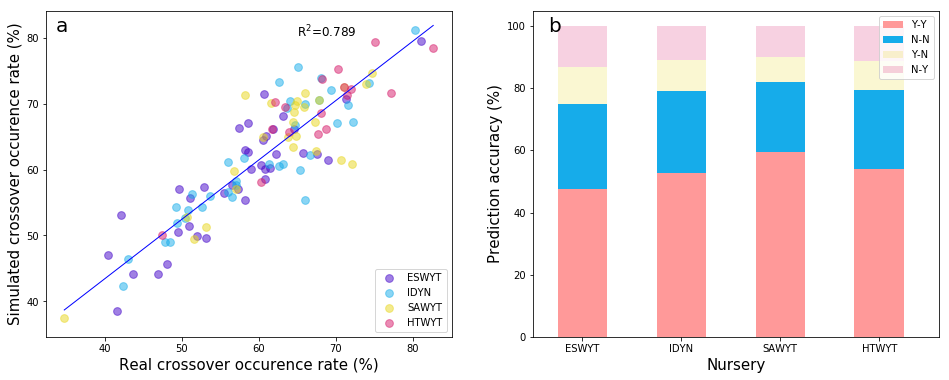

In [5]:
nursery=['ESWYT','IDYN','SAWYT','HTWYT']
colors=['#4203c9', '#16acea', '#e8d71e','#d71b6b',]
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,6))
al=0.1
Wea='ARC5'
df=pd.read_csv(data_out+"NoEj_"+str(al)+"_cross_over_"+Wea+".csv")
sns.regplot(100*df['cross_r']/(df['nline']*(df['nline']-1)/2),100*df['cross_s']/(df['nline']*(df['nline']-1)/2),ax=ax[0],
            scatter_kws={"s": 0},line_kws={'lw':1},color='b',ci=0,robust=True,truncate=True)
#ax[1].plot([0,2500],[0,2500])
for n in range(4): #nursery_reorder: 
    df0=df[df['nursery']==nursery[n]]
    ax[0].scatter(100*df0['cross_r']/(df0['nline']*(df0['nline']-1)/2),100*df0['cross_s']/(df0['nline']*(df0['nline']-1)/2),
                      marker='o',color=colors[n],s=60,alpha=0.5,label=nursery[n])

ax[0].legend(loc=4)

r2=round(np.corrcoef(100*df['cross_r']/(df['nline']*(df['nline']-1)/2),100*df['cross_s']/(df['nline']*(df['nline']-1)/2))[0,1]**2,3)

#order = [3,0,1,2]
#r2=round(np.corrcoef(df['cross_r'],df['cross_s'])[0,1]**2,3)
ax[0].text(65,80,'R$^2$='+str(r2),fontsize=12)
ax[0].set_xlabel('Real crossover occurence rate (%)',fontsize=15)
ax[0].set_ylabel('Simulated crossover occurence rate (%)',fontsize=15)
ax[0].text(ax[0].get_xlim()[0]+(ax[0].get_xlim()[1]-ax[0].get_xlim()[0])/40,
           ax[0].get_ylim()[1]-(ax[0].get_ylim()[1]-ax[0].get_ylim()[0])/15,'a',fontsize=20)
stack=['Y-Y','N-N','Y-N','N-Y']
df0=df[['nursery','Y-Y','N-N','Y-N','N-Y']]
colors1 = ['#FF9999', '#00BFFF','#CAE1FF','#FFDEAD','#C1FFC1']
df0=df.groupby('nursery').mean().reset_index()[['nursery','Y-Y','N-N','Y-N','N-Y']]
df0['sum']=df0[stack].sum(axis=1)
for col in stack: df0[col]=100*df0[col]/df0['sum']

barWidth=0.5
s=0
YY=[df0.loc[0,stack[s]],df0.loc[2,stack[s]],df0.loc[1,stack[s]],df0.loc[3,stack[s]]]
s=1
NN=[df0.loc[0,stack[s]],df0.loc[2,stack[s]],df0.loc[1,stack[s]],df0.loc[3,stack[s]]]
s=2
YN=[df0.loc[0,stack[s]],df0.loc[2,stack[s]],df0.loc[1,stack[s]],df0.loc[3,stack[s]]]
s=3
NY=[df0.loc[0,stack[s]],df0.loc[2,stack[s]],df0.loc[1,stack[s]],df0.loc[3,stack[s]]]

ax[1].bar(nursery[:4],YY,color=colors1[0],width=barWidth,label='Y-Y')
ax[1].bar(nursery[:4],NN,color=colors[1],bottom=np.array(YY),width=barWidth,label='N-N')
ax[1].bar(nursery[:4],YN,color=colors[2],bottom=np.add(NN,YY),width=barWidth,label='Y-N',alpha=0.2)
ax[1].bar(nursery[:4],NY,color=colors[3],bottom=np.add(np.add(YY,NN),YN),width=barWidth,label='N-Y',alpha=0.2)
ax[1].legend(loc=1,)
ax[1].set_xlabel('Nursery',fontsize=15)
ax[1].set_ylabel('Prediction accuracy (%)',fontsize=15)
ax[1].text(ax[1].get_xlim()[0]+(ax[1].get_xlim()[1]-ax[1].get_xlim()[0])/50,
           ax[1].get_ylim()[1]-(ax[1].get_ylim()[1]-ax[1].get_ylim()[0])/15,'b',fontsize=20)
ax[1].set_xlim([-0.5,3.6])
fig.savefig(plot_out+"Fig2_GxEcrossValidation_"+str(0.1)+"R2.pdf",dpi=300,bbox_inches = 'tight')

In [50]:
np.array(YY)+np.array(NN)

array([75.09077499, 79.01514464, 82.11113272, 79.29332206])

# Results 3 - prediction for all lines in all locations

In [32]:
import glob
from datetime import timedelta

In [ ]:
#Step 1 - Yield average for programs and the yearly variations

In [178]:
#Step 1 - Table 1, find u the grand_mean of the yld across the site/year/program combinations for observed yields
base_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\1.0_Cross_Over\\"
yld=pd.DataFrame(columns=['nursery','year','yld','pro_mean','u'])
for n in nursery:
    df=pd.read_csv(base_dir+"/1_Data/"+n+"_yld.csv")
    df['yld']=df['yld'].replace(r'^\s+$', np.nan, regex=True)
    df=df.dropna()
    df.loc[:,'yld']=df['yld'].astype('float')
    df=df[['year','yld']].groupby(by='year').mean().reset_index()
    df['pro_mean']=df['yld'].mean()
    df['u']=df['yld']-df['pro_mean']
    df['nursery']=n
    yld=yld.append(df,sort=False)
yld.to_csv("u.csv",index=False)
#Ej   
yld=pd.DataFrame(columns=['nursery','loc','Ej','seasonn'])
for n in nursery:
    df1=pd.DataFrame(columns=['nursery','loc','Ej','seasonn'])
    df0=pd.DataFrame(columns=['loc','year','Ej'])
    df=pd.read_csv(base_dir+"/1_Data/"+n+"_yld.csv")
    df=df[['loc','year','yld']].replace(r'^\s+$', np.nan, regex=True)
    df.loc[:,'yld']=df['yld'].astype('float')
    df=df.dropna()
    for yr in df['year'].unique():
        temp=df[df['year']==yr]
        temp['yld']=temp['yld'].replace(r'^\s+$', np.nan, regex=True)
        temp=temp.dropna()
        temp.loc[:,'yld']=temp['yld'].astype('float')
        temp=temp[['loc','year','yld']].groupby('loc').mean().reset_index()
        temp.loc[:,'Ej']=[x-temp['yld'].mean() for x in temp['yld']]
        df0=df0.append(temp[['loc','year','Ej']])
    df0=df0.pivot_table(index='loc',columns='year',values='Ej',aggfunc='mean').reset_index()
    df1['Ej']=np.nanmean(df0.iloc[:,1:],axis=1)
    df1['loc']=df0['loc']
    df1['nursery']=n
    df2=df.groupby(['loc','year']).mean()
    loc=df2.groupby('loc').count().reset_index()
    df1=df1.merge(loc,how='left')
    yld=yld.append(df1,sort=False)
yld.to_csv(data_out+"Ej.csv",index=False)

In [79]:
#Modelled yield: Gi+Ej+Gi*Ej
#Computing site mean yield for all years
Wea='ARC5'
for a in ['10','1','0.01','0.001','0']: #'0.1',
#fit_ori=pd.read_csv(data_out+"NoEj_"+str(a)+'_fit_quad_tmatmiprravphu_vegrefgif_'+Wea+'_withGi.csv')
    fit_ori=pd.read_csv(data_out+"NoEj_"+str(a)+'_fit_quad_tmatmiprravphu_vegrefgif_'+Wea+'_withGi.csv')
    #fit_ori=fit_ori[fit_ori['G!']!='1_LOCAL CHECK']
    df=pd.DataFrame(columns=['nursery','loc','meanyld'])
    for n in nursery[:4]:
        fit_n=fit_ori[fit_ori['nursery']==n].iloc[:,3:]
        All_yld=pd.DataFrame() #columns=loc
        for yr in range(1980,2019):
            name=[]
            for pe in per[1:]:
                for x in env_cli:
                    name.append(x+'_'+pe+'SQ')
                    name.append(x+'_'+pe)
            cli=pd.read_csv(wea_dir+'Climate/'+Wea+'_cli4all_clean_'+n+'_'+per[1]+'_'+str(yr)+'.csv')
            #cli=pd.read_csv(wea_dir+'Climate/cli4all_clean_'+n+'_'+per[1]+'_'+str(yr)+'.csv')
            cli=cli[['loc']+env_cli]
            cli.columns=['loc']+[x+'_'+per[1] for x in cli.columns[1:]]
            for s in per[2:]:
                temp=pd.read_csv(wea_dir+'Climate/'+Wea+'_cli4all_clean_'+n+'_'+s+'_'+str(yr)+'.csv')
                #temp=pd.read_csv(wea_dir+'Climate/cli4all_clean_'+n+'_'+s+'_'+str(yr)+'.csv')
                temp=temp[env_cli]
                temp.columns=[x+'_'+s for x in temp.columns]
                cli=pd.concat([cli,temp],axis=1)
            for col in cli.columns[1:]: cli[col+'SQ']=cli[col]**2
            cli=cli[['loc']+name]
        #   cli=cli[cli['loc'].isin(Site['loc'].tolist())].dropna()
            A=np.asarray(fit_n.iloc[:,1:37]).dot(np.asarray(cli.loc[:,fit_n.columns[1:37]]).T)
            A=pd.DataFrame(A)
            for j in range(A.shape[1]): A.iloc[:,j]=A.iloc[:,j]+fit_n.iloc[:,0].values+fit_n.loc[:,'Gi'].values#+u
            A.columns=cli['loc'].tolist()
            All_yld=All_yld.append(A)
        Site=All_yld.mean(axis=0,skipna=True).reset_index().dropna()
        Site.columns=['loc','meanyld']
        Site['nursery']=n
        Site['Ej']=Site['meanyld']-np.nanmean(Site['meanyld'])
        df=df.append(Site,sort=True)
    df.to_csv(data_out+str(a)+'_modeled_site_mean_yld_'+Wea+'.csv',index=False)

In [ ]:
#Step 2 - Estimate the mean climate for each site and year

In [74]:
###########################Estimate the mean climate for each site and year########################################
##########################Using curated growth period _clean#########################################################
######################################################Step3################################################################
#Table 3 - Find Ej and mean climate for the three periods, heading, 
           #flowering, and maturity period and climates for all the lines and environment
#####################################Functions to find the cloest weather sites############################################
#weat_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\Weather\\MelArc\\"
weat_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\Weather\\ARC5\\"
def cloest_wea(lat,lon):
    wea=[os.path.splitext(os.path.basename(x))[0] for x in glob.glob(weat_dir+"*.csv")]
    wea=pd.DataFrame([x.split('_') for x in wea])
    wea['la']=wea.iloc[:,0].astype('float')
    wea['lo']=wea.iloc[:,1].astype('float')
    wea['dis']=((wea['la']-lat)**2+(wea['lo']-lon)**2)**(1/2)
    min_value=wea['dis'].min()
    #min_index=np.argmin(wea['dis'])
    min_index=wea['dis'].idxmin(axis=0,skipna=True)
    if min_value<5:
        return wea.iloc[min_index,0]+"_"+wea.iloc[min_index,1]
    else:
        return 'nan'   
############################################################################################################################
######################################Function to estimate the climate variables############################################
#veg: sow - 300 GDD before heading
#rep: 200 GDD before heading to 100 GDD after heading
#gfi: 100 GDD after heading to matu
#0:'sea',1:'veg',2:'rep',3:'gfi',4:'bhe',5:'ahe'
def weat_result(file,ye,sow,head,anth,matu,period):
    pd.set_option('mode.chained_assignment', None)
    #period_s=['sow1','sow1','head_b300','head_a100','sow1','head1']
    #period_s=[None]*6
    #period_e=['matu1','head_b300','head_a100','matu','head1','matu1']
    #period_e=[None]*6
    out=[None]*18 #18 Climatic indices by 35 year plut slope and sig 
    if os.path.isfile(file):
        df_we=pd.read_csv(file)
        df_we.columns=['Date','Rad','Tmax','Tmin','Prec','Rh','VPD','WS']
        df_we['Tavg']=round((df_we['Tmin']+df_we['Tmax'])/2,1)
        ye=int(ye)
        sow=int(sow) 
        matu=int(matu)
        sow1=int(str(pd.to_datetime(str(ye)+'-1-1')+timedelta(days=sow))[:10].replace('-',''))  #Sowdate
        matu1=int(str(pd.to_datetime(str(ye)+'-1-1')+timedelta(days=(sow+matu)))[:10].replace('-','')) #Matudate
        #Identify the heading date
        if str(head)!='nan':
            head1=int(str(pd.to_datetime(str(ye)+'-1-1')+timedelta(days=(sow+int(head))))[:10].replace('-','')) 
        elif str(anth)!='nan':
            anth1=int(str(pd.to_datetime(str(ye)+'-1-1')+timedelta(days=(sow+int(anth))))[:10].replace('-',''))
            gdd=0
            i=0
            while gdd<80:   #80 GDD before the anthesis is the heading
                i=i+1
                we_index=df_we[df_we['Date']==anth1].index
                t=float(df_we.loc[we_index-i,'Tavg']) if df_we.loc[we_index-i,'Tavg'].values>0 else 0
                gdd=gdd+t
            head1=int(df_we.loc[we_index-i,'Date'])
        else:
            head1='nan'
        #Identify the 300GDD before and 100 GDD after heading date
        if str(head1)!='nan': #anth-80=head
            gdd=0
            i=0
            while gdd<300:
                i=i+1
                we_index=df_we[df_we['Date']==head1].index
                t=float(df_we.loc[we_index-i,'Tavg']) if df_we.loc[we_index-i,'Tavg'].values>0 else 0
                gdd=gdd+t
            head_b300=int(df_we.loc[we_index-i,'Date'])
            gdd=0
            i=0
            while gdd<100:
                i=i+1
                we_index=df_we[df_we['Date']==head1].index
                t=float(df_we.loc[we_index+i,'Tavg']) if df_we.loc[we_index-i,'Tavg'].values>0 else 0
                gdd=gdd+t
            head_a100=int(df_we.loc[we_index-i,'Date'])
        else:
            head_b300,head_a100=['nan','nan']
        period_s=[sow1,sow1,head_b300,head_a100]
        period_e=[matu1,head_b300,head_a100,matu1]
        if (str(period_s[period])!='nan')&(str(period_e[period])!='nan'):
            df_t=df_we[(df_we['Date']>=period_s[period]) & (df_we['Date']<=period_e[period])]
            tmax=round(df_t['Tmax'].mean(),1)
            tmin=round(df_t['Tmin'].mean(),1)
            tavg=round(df_t['Tavg'].mean(),1)
            tdr=round((df_t['Tmax']-df_t['Tmin']).mean(),1)
            pre=round(df_t['Prec'].sum(),1)
            rad=round(df_t['Rad'].mean()*0.0036,1)
            vpd=round(df_t['VPD'].mean(),1)
            hud=round(df_t['Rh'].mean(),1)
            gdd0=round(df_t[df_t['Tavg']>0]['Tavg'].sum()/100,3)
            gdd8=round(df_t[df_t['Tavg']>=8]['Tavg'].sum()/100,3)
            edd28=round(df_t[df_t['Tmax']>=28]['Tmax'].sum()/100,3)
            edd29=round(df_t[df_t['Tmax']>=29]['Tmax'].sum()/100,3)
            edd30=round(df_t[df_t['Tmax']>=30]['Tmax'].sum()/100,3)
            edd31=round(df_t[df_t['Tmax']>=31]['Tmax'].sum()/100,3)
            edd32=round(df_t[df_t['Tmax']>=32]['Tmax'].sum()/100,3)
            edd33=round(df_t[df_t['Tmax']>=33]['Tmax'].sum()/100,1)
            edd34=round(df_t[df_t['Tmax']>=34]['Tmax'].sum()/100,1)
            edd35=round(df_t[df_t['Tmax']>=35]['Tmax'].sum()/100,1)
            out=[tmax,tmin,tavg,tdr,pre,rad,vpd,hud,gdd0,gdd8,edd28,edd29,edd30,edd31,edd32,edd33,edd34,edd35]    
    return out

#####################################################################################################################   
stage=['lat','lon','dayofsow','head1','anth','matu1','dayofhar']
period=['sea','veg','rep','gfi'] #season, vergation, reproduction, grailfilling, beforeheading, afterheading
cli=['tmax','tmin','pre','rad','vpd','hud']
Wea='ARC5'
#al=0.1
for n in nursery[:4]:
    out=pd.DataFrame(columns=['nursery','loc']+stage)
    df=pd.read_csv(data_out+n+'_ALL_LINES_clean_'+Wea+'.csv',low_memory=False)
    df['loc']=[x.split("_")[1] for x in df['E!'].tolist()]
    df=df[['loc','year']+['lat','lon','dayofsow','head1','anth','matu1','dayofhar']]
    for s in stage:
        df[s]=df[s].replace(r'^\s+$', np.nan, regex=True)
        df[s]=df[s].astype('float')
        df0=df.pivot_table(index='loc',columns='year',values=s,aggfunc='mean').reset_index()
        out[s]=np.nanmedian(df0.iloc[:,1:],axis=1)
    out['nursery']=n
    out['loc']=df0['loc']
    out=out.dropna(thresh=7).reset_index().drop(columns='index')
    for p in range(1,4): #,len(period)
        for yr in range(1985,2018):
            temp=pd.DataFrame(columns=cli)
            for rowi in out.index:
                lat=out.loc[rowi,'lat']
                lon=out.loc[rowi,'lon']
                file=weat_dir+cloest_wea(lat,lon)+'.csv'
               #sow/head/anth/matu/harv equal site average is not known
                sow=out.loc[rowi,'dayofsow'] 
                head=out.loc[rowi,'head1']
                anth=out.loc[rowi,'anth']
                matu=out.loc[rowi,'matu1']
                harv=out.loc[rowi,'dayofhar']
                #Maturity is 45 less than harvesting day if maturity day is nan
                #if np.isnan(matu)&(not np.isnan(harv)):
                #    if harv>250: matu=harv-45
                #    if (harv>=200) & (harv<250): matu=harv-30
                #    if (harv>=150) & (harv<200): matu=harv-15
                #    if harv<150: matu=harv
                weat=weat_result(file,yr,sow,head,anth,matu,p)
                temp.loc[len(temp)]=[weat[0],weat[1],weat[4],weat[5],weat[6],weat[7]] #Tmax,Tmin,Prep,Radi,VPN,Hud
            df1=pd.concat([out,temp],axis=1)
            df1.to_csv(data_out+"climate/"+Wea+"_cli4all_clean_"+n+"_"+period[p]+"_"+str(yr)+".csv",index=False)

In [ ]:
#Step 3 - Prediction for All sites and lines

In [82]:
env_cli=['tmax','tmin','pre','rad','vpd','hud']
per=['sea','veg','rep','gfi']
a=0.1
Wea='ARC5'
out=pd.DataFrame(columns=['nursery','year','cultivar','nline','nsite','cross-over'])
data_out="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\1.0_Cross_Over\\2_Results\\NP_data\\"
wea_dir=data_out
#wea_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\1.0_Cross_Over\\6_Figures\\NCC_R1_Fig2-Fig4\\"

for a in ['10','1','0.01','0.001','0']: #'0.1',
    out=pd.DataFrame(columns=['nursery','year','cultivar','nline','nsite','cross-over'])
    fit_ori=pd.read_csv(data_out+"NoEj_"+str(a)+'_fit_quad_tmatmiprravphu_vegrefgif_'+Wea+'_withGi.csv')
    fit_ori=fit_ori[fit_ori['G!']!='1_LOCAL CHECK']
    for n in nursery[:4]:
        fit_n=fit_ori[fit_ori['nursery']==n].iloc[:,3:]
        Site=pd.read_csv(data_out+'loc_season_number.csv')
        Site=Site[(Site['nursery']==n)&(Site['seasonn']>=5)]
        Site1=pd.read_csv(data_out+str(a)+'_modeled_site_mean_yld_'+Wea+'.csv')
        Site1=Site1[Site1['nursery']==n]
        Site1=Site1[Site1['loc'].isin(Site['loc']).tolist()].dropna()
        #Site1=Site1[(Site1.meanyld<Site1.meanyld.mean()+np.std(Site1.meanyld))&(Site1.meanyld>Site1.meanyld.mean()-np.std(Site1.meanyld))].dropna()

        line_group=int(len(fit_n)/50)
        for yr in range(1980,2019):
            #Read climate
            name=[]
            for pe in per[1:]:
                for x in env_cli:
                    name.append(x+'_'+pe+'SQ')
                    name.append(x+'_'+pe)
            cli=pd.read_csv(wea_dir+'Climate/'+Wea+'_cli4all_clean_'+n+'_'+per[1]+'_'+str(yr)+'.csv')
            #cli=pd.read_csv(wea_dir+'Climate/cli4all_clean_'+n+'_'+per[1]+'_'+str(yr)+'.csv')
            cli=cli[['loc']+env_cli]
            cli.columns=['loc']+[x+'_'+per[1] for x in cli.columns[1:]]
            for s in per[2:]:
                temp=pd.read_csv(wea_dir+'Climate/'+Wea+'_cli4all_clean_'+n+'_'+s+'_'+str(yr)+'.csv')
                #temp=pd.read_csv(wea_dir+'Climate/cli4all_clean_'+n+'_'+s+'_'+str(yr)+'.csv')
                temp=temp[env_cli]
                temp.columns=[x+'_'+s for x in temp.columns]
                cli=pd.concat([cli,temp],axis=1)
            for col in cli.columns[1:]: cli[col+'SQ']=cli[col]**2
            cli=cli[['loc']+name]
            cli=cli[cli['loc'].isin(Site1['loc'].tolist())].dropna()
            Site1=Site1[Site1['loc'].isin(cli['loc'].tolist())]

            for g in range(line_group): 
                fit_g=fit_n.iloc[(g*50):((g+1)*50),:]
                #cli=cli.merge(Ej_n,on='loc',how='left')
                A=np.asarray(fit_g.iloc[:,1:37]).dot(np.asarray(cli.loc[:,fit_g.columns[1:37]]).T)
                A=pd.DataFrame(A)
                for j in range(A.shape[1]): A.iloc[:,j]=A.iloc[:,j]+fit_g.iloc[:,0].values+fit_g.loc[:,'Gi'].values
                fit=[]
                for row in range(A.shape[0]):
                    temp=pd.DataFrame()
                    temp['yld']=A.iloc[row,:].tolist()
                    temp['mean']=Site1['Ej'].tolist()
                    #temp['mean']=A.mean(axis=0).tolist()#
                    temp=temp.dropna()
                    X_opt = np.asarray(temp['mean'])
                    X_opt=sm.add_constant(X_opt)
                    y=np.asarray(temp['yld'])
                    OLS = sm.OLS(endog = y, exog = X_opt).fit()
                    fit=fit+[OLS.params.tolist()]
                cross=pd.DataFrame()
                gen=np.asarray([[i,j] for i in range(len(fit)-1) for j in range(i+1,len(fit))])
                cross['a1']=[fit[i][1] for i in gen[:,0]] 
                cross['b1']=[fit[i][0] for i in gen[:,0]]
                cross['a2']=[fit[i][1] for i in gen[:,1]] 
                cross['b2']=[fit[i][0] for i in gen[:,1]]
                cross['s']=(cross['b2']-cross['b1'])/(cross['a1']-cross['a2'])
                #cross['cross']=[1 if (x>A.mean(axis=0).min())&(x<A.mean(axis=0).max()) else 0 for x in cross['s']]
                cross['cross']=[1 if (x>Site1['Ej'].quantile(q=0.05))&(x<Site1['Ej'].quantile(q=0.95)) else 0 for x in cross['s']]
                #cross['cross']=[1 if (x>Site1['Ej'].min())&(x<Site1['Ej'].max()) else 0 for x in cross['s']]
                cross_n=cross['cross'].sum()
                #Output the value        
                out.loc[len(out)]=[n,yr,g+1,fit_g.shape[0],cli.shape[0],cross_n]
    out.to_csv(data_out+'NoEj_'+str(a)+'_prediction_gxe_crossover_clean_'+Wea+'_SiteSeasonGt5_nocheck.csv')

In [ ]:
#Step 4 - Plotting

In [7]:
#Plotting
#Color gradients
def hex_to_RGB(hex):
  ''' "#FFFFFF" -> [255,255,255] '''
  # Pass 16 to the integer function for change of base
  return [int(hex[i:i+2], 16) for i in range(1,6,2)]
def RGB_to_hex(RGB):
  ''' [255,255,255] -> "#FFFFFF" '''
  # Components need to be integers for hex to make sense
  RGB = [int(x) for x in RGB]
  return "#"+"".join(["0{0:x}".format(v) if v < 16 else
            "{0:x}".format(v) for v in RGB])
def color_dict(gradient):
  ''' Takes in a list of RGB sub-lists and returns dictionary of
    colors in RGB and hex form for use in a graphing function
    defined later on '''
  return {"hex":[RGB_to_hex(RGB) for RGB in gradient],
      "r":[RGB[0] for RGB in gradient],
      "g":[RGB[1] for RGB in gradient],
      "b":[RGB[2] for RGB in gradient]}

def linear_gradient(start_hex, finish_hex="#FFFFFF", n=10):
  ''' returns a gradient list of (n) colors between
    two hex colors. start_hex and finish_hex
    should be the full six-digit color string,
    inlcuding the number sign ("#FFFFFF") '''
  # Starting and ending colors in RGB form
  s = hex_to_RGB(start_hex)
  f = hex_to_RGB(finish_hex)
  # Initilize a list of the output colors with the starting color
  RGB_list = [s]
  # Calcuate a color at each evenly spaced value of t from 1 to n
  for t in range(1, n):
    # Interpolate RGB vector for color at the current value of t
    curr_vector = [
      int(s[j] + (float(t)/(n-1))*(f[j]-s[j]))
      for j in range(3)
    ]
    # Add it to our list of output colors
    RGB_list.append(curr_vector)
  return color_dict(RGB_list)

def removeOutliers(x, outlierConstant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = [lower_quartile - IQR, upper_quartile + IQR]
    return quartileSet

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


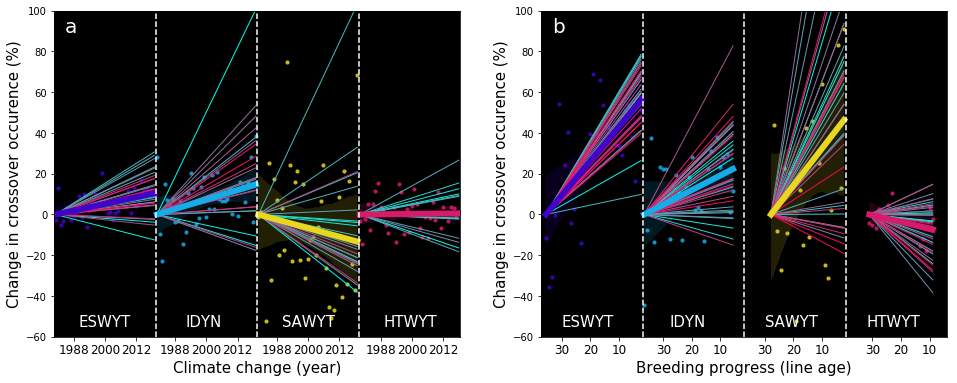

In [8]:
#Plotting
#Color gradients
nursery=['ESWYT','IDYN','SAWYT','HTWYT']
colors=['#4203c9', '#16acea', '#e8d71e','#d71b6b']
a=0.1
Wea='ARC5'
fittype=['absolute','relative']
#colors=['#4203c9', '#16acea', '#d71b6b', '#e8d71e']
colors_start=['#d3ffbe','#bee8ff','#ffbebe','#ffbeff']
colors_end=['#269b00','#004c73','#9b0000','#4c0073']
markers=['.','+','x','*']
x_cross=[10,38,65,92]
rubt1or0 = False

out=pd.read_csv(data_out+'NoEj_'+str(a)+'_prediction_gxe_crossover_clean_'+Wea+'_SiteSeasonGt5_nocheck.csv')
fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(16,6))
result=pd.DataFrame(columns=['nursery','CC','slope','intercept','Change','R2','P-value','BP','slope','intercept','Change','R2','P-value'])
for n in range(4):
    change=[]
    df0=out[out['nursery']==nursery[n]]
    df0['cross']=100*df0['cross-over']/(df0['nline']*(df0['nline']-1)/2)
##############################Climate change#########################################################
    x=np.asarray(list(range(1,40)))+n*39
    #x=np.asarray(list(range(1,34)))+n*33
    #"#ffff00","#0000ff" #grey "#F3F0F0","#000000" #Red blue "#FF0000","#0000FF"
    #color_ramp=linear_gradient("#FF0000","#0000FF",len(out['cultivar'].unique()))['hex']
    color_ramp=linear_gradient("#00FFEA","#FF005D",len(out['cultivar'].unique()))['hex']
    for l in df0['cultivar'].unique():
        df=df0[df0['cultivar']==l][['year','cross']]
        X_opt=np.asarray(x)
        X_opt=sm.add_constant(X_opt)
        y=np.asarray(df['cross'])
        OLS = sm.OLS(endog = y.astype(np.float64), exog = X_opt.astype(np.float64)).fit()
        bs=OLS.params[0]+OLS.params[1]*x.min()
        cross=100*(df['cross']-bs)/bs
        sns.regplot(x.astype('float'),cross,scatter=True,ci=0,scatter_kws={'s':0},
                    line_kws={'lw':1,'alpha': 1,'color':color_ramp[l-1]},ax=ax[0],truncate=True,robust=rubt1or0)
        #sns.regplot(x.astype('float'),cross,scatter=True,ci=0,scatter_kws={'s':0},
        #            line_kws={'lw':0.1+(l-1)*0.1,'alpha': 0.6,'color':color_ramp[l-1]},ax=ax[0],truncate=True,robust=rubt1or0)

    df=df0[['year','cross']].apply(pd.to_numeric)
    df=df.groupby('year')['cross'].mean().reset_index()
    X_opt=np.asarray(x)
    X_opt=sm.add_constant(X_opt)
    y=np.asarray(df['cross'])
    OLS = sm.OLS(endog = y.astype(np.float64), exog = X_opt.astype(np.float64)).fit()
    bs=OLS.params[0]+OLS.params[1]*x.min()
    cross=100*(df['cross']-bs)/bs
    sns.regplot(x.astype('float'),cross,scatter=True,ax=ax[0],scatter_kws={"s": 10},
                line_kws={'lw':6},marker='o',color=colors[n],truncate=True,robust=rubt1or0)
    change=[nursery[n],'CC',OLS.params[1],OLS.params[0],OLS.params[1]*39*100/bs,OLS.rsquared,OLS.pvalues[1]]
    
#################################################Breeding progress###################################################
    if n==0 or n==2:x=np.asarray(df0['cultivar'].unique()+(32-len(df0['cultivar'].unique())))+n*32 #ESWYT
    if n==1: x=np.asarray(df0['cultivar'].unique())+n*32
    if n==3: x=np.asarray([8,9,10,11,12,13,14,15,16,24,25,26,27,28])+n*32
    #if n==2: x=np.asarray([8,9,10,11,12,13,14,15,16,24,25,26,27])+n*32

    color_ramp=linear_gradient("#00FFEA","#FF005D",len(out['year'].unique()))['hex']
    for l in df0['year'].unique():
        df=df0[df0['year']==l][['cultivar','cross']]
        X_opt=np.asarray(x)
        X_opt=sm.add_constant(X_opt)
        y=np.asarray(df['cross'])
        OLS = sm.OLS(endog = y.astype(np.float64), exog = X_opt.astype(np.float64)).fit()
        bs=OLS.params[0]+OLS.params[1]*x.min()
        cross=100*(df['cross']-bs)/bs
        sns.regplot(x.astype('float'),cross,scatter=True,ci=0,scatter_kws={'s':0},
                    line_kws={'lw':1,'alpha': 1,'color':color_ramp[l-1980]},ax=ax[1],truncate=True,robust=rubt1or0)
        #sns.regplot(x.astype('float'),cross,scatter=True,ci=0,scatter_kws={'s':0},
        #            line_kws={'lw':0.1+(l-1980)*0.05,'alpha': 0.3,'color':colors[n]},ax=ax[1],truncate=True,robust=rubt1or0)

    df=df0[['cultivar','cross']].apply(pd.to_numeric)
    df=df.groupby('cultivar')['cross'].mean().reset_index()   
    X_opt=np.asarray(x)
    X_opt=sm.add_constant(X_opt)
    y=np.asarray(df['cross'])
    OLS = sm.OLS(endog = y.astype(np.float64), exog = X_opt.astype(np.float64)).fit()
    bs=OLS.params[0]+OLS.params[1]*x.min()
    cross=100*(df['cross']-bs)/bs
    sns.regplot(x.astype('float'),cross,scatter=True,ax=ax[1],scatter_kws={"s": 10},
                line_kws={'lw':6},marker='o',color=colors[n],truncate=True,robust=rubt1or0)
    change=change+['BP',OLS.params[1],OLS.params[0],OLS.params[1]*(x.max()-x.min())*100/bs,OLS.rsquared,OLS.pvalues[1]]
    
    result.loc[len(result)]=change
#Text and labels
#ax[0].set_xlim([0.5,132.5])
ax[0].set_xlim([0.5,156.5])
ax[0].axvline(39.5,color='white',ls='--')
ax[0].axvline(78.5,color='white',ls='--')
ax[0].axvline(117.5,color='white',ls='--')
ax[0].set_xticks([])

ax[1].set_xlim([0.5,128.5])
ax[1].axvline(32.5,color='white',ls='--')
ax[1].axvline(64.5,color='white',ls='--')
ax[1].axvline(96.5,color='white',ls='--')
ax[1].set_xticks([])

#Xlim labels
labels=[8,20,32,47,59,71,86,98,110,126,138,150]
labels_year=[1988,2000,2012,1988,2000,2012,1988,2000,2012,1988,2000,2012]
ax[0].set_xticks(labels)
ax[0].set_xticklabels(labels_year,fontsize=12) #,rotation=270, ha='right')

labels=[7,16,25,39,48,57,71,80,89,105,114,123]
#labels_line=[5,13,22,5,13,22,5,13,22,5,13,22]
labels_line=[30,20,10,30,20,10,30,20,10,30,20,10]
ax[1].set_xticks(labels)
ax[1].set_xticklabels(labels_line,fontsize=12)

ax[0].set_ylim([-60,100])
ax[0].text(ax[0].get_xlim()[0]+(ax[0].get_xlim()[1]-ax[0].get_xlim()[0])/40,
           ax[0].get_ylim()[1]-(ax[0].get_ylim()[1]-ax[0].get_ylim()[0])/15,'a',fontsize=20,color='white')

ax[1].set_ylim([-60,100])
ax[1].text(ax[1].get_xlim()[0]+(ax[1].get_xlim()[1]-ax[1].get_xlim()[0])/37,
          ax[1].get_ylim()[1]-(ax[1].get_ylim()[1]-ax[1].get_ylim()[0])/15,'b',fontsize=20,color='white')

for n in range(4):
    if n==1:
        ax[0].text(12+39*n,-55,nursery[n],fontsize=15,color='white')
        ax[1].text(9+32*n,-55,nursery[n],fontsize=15,color='white')
    else:
        ax[0].text(10+39*n,-55,nursery[n],fontsize=15,color='white')
        ax[1].text(7+32*n,-55,nursery[n],fontsize=15,color='white')
    
ax[0].set_ylabel("Change in crossover occurence (%)",fontsize=15)
ax[1].set_ylabel("Change in crossover occurence (%)",fontsize=15)
ax[0].set_xlabel("Climate change (year)",fontsize=15)
ax[1].set_xlabel("Breeding progress (line age)",fontsize=15)
ax[0].set_facecolor('xkcd:salmon')
ax[0].set_facecolor((0.0, 0.0, 0.0))
ax[1].set_facecolor('xkcd:salmon')
ax[1].set_facecolor((0, 0, 0))
fig.savefig(base_dir+"6_Figures/NP_Plots/Fig3_0.1_CrossPredition_"+Wea+"_SeasonGt5_noCheck_backgroudR2.pdf",dpi=300,bbox_inches='tight')

In [77]:
result

,nursery,CC,slope,intercept,Change,R2,P-value,BP,slope,intercept,Change,R2,P-value
0,ESWYT,CC,0.181866,66.616527,10.618173,0.245467,0.001341,BP,1.026741,52.799251,56.154400,0.397313,0.000144
1,IDYN,CC,0.207220,45.514239,15.020654,0.130681,0.023748,BP,0.413991,38.282617,22.315721,0.133681,0.051120
2,HTWYT,CC,0.008555,65.238445,0.506188,0.000358,0.908936,BP,-0.250831,86.394121,-7.341275,0.114670,0.236294
3,SAWYT,CC,-0.105951,42.833794,-13.623061,0.017921,0.416513,BP,0.463131,-25.636263,46.328215,0.095373,0.142013


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


ValueError: endog and exog matrices are different sizes

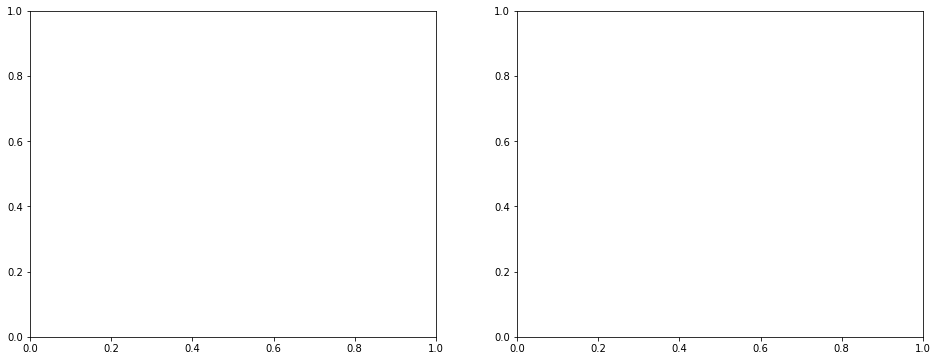

In [55]:
#Plotting
#Color gradients
Wea='METE'
fittype=['absolute','relative']
colors=['#4203c9', '#16acea', '#d71b6b', '#e8d71e']
colors_start=['#d3ffbe','#bee8ff','#ffbebe','#ffbeff']
colors_end=['#269b00','#004c73','#9b0000','#4c0073']
markers=['.','+','x','*']
x_cross=[10,38,65,92]
rubt1or0 = False

out=pd.read_csv(data_out+'NoEj_'+str(a)+'_prediction_gxe_crossover_clean_'+Wea+'_SiteSeasonGt5_nocheck.csv')
fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(16,6))
result=pd.DataFrame(columns=['nursery','CC','Change','R2','P-value','BP','Change','R2','P-value'])
for n in range(4):
    change=[]
    df0=out[out['nursery']==nursery[n]]
    df0['cross']=100*df0['cross-over']/(df0['nline']*(df0['nline']-1)/2)
##############################Climate change#########################################################
    x=np.asarray(list(range(1,40)))+n*39
    #x=np.asarray(list(range(1,34)))+n*33
    #"#ffff00","#0000ff" #grey "#F3F0F0","#000000" #Red blue "#FF0000","#0000FF"
    color_ramp=linear_gradient("#FF0000","#0000FF",len(out['cultivar'].unique()))['hex']
    for l in df0['cultivar'].unique():
        df=df0[df0['cultivar']==l][['year','cross']]
        X_opt=np.asarray(x)
        X_opt=sm.add_constant(X_opt)
        y=np.asarray(df['cross'])
        OLS = sm.OLS(endog = y.astype(np.float64), exog = X_opt.astype(np.float64)).fit()
        bs=OLS.params[0]+OLS.params[1]*x.min()
        cross=100*(df['cross']-bs)/bs
        sns.regplot(x.astype('float'),cross,scatter=True,ci=0,scatter_kws={'s':0},
                    line_kws={'lw':1,'alpha': 0.3,'color':color_ramp[l-1]},ax=ax[0],truncate=True,robust=rubt1or0)
    df=df0[['year','cross']].apply(pd.to_numeric)
    df=df.groupby('year')['cross'].mean().reset_index()
    X_opt=np.asarray(x)
    X_opt=sm.add_constant(X_opt)
    y=np.asarray(df['cross'])
    OLS = sm.OLS(endog = y.astype(np.float64), exog = X_opt.astype(np.float64)).fit()
    bs=OLS.params[0]+OLS.params[1]*x.min()
    cross=100*(df['cross']-bs)/bs
    sns.regplot(x.astype('float'),cross,scatter=True,ax=ax[0],scatter_kws={"s": 10},
                line_kws={'lw':5},marker='o',color=colors[n],truncate=True,robust=rubt1or0)
    change=[nursery[n],'CC',OLS.params[1]*39*100/bs,OLS.rsquared,OLS.pvalues[1]]
    
#################################################Breeding progress###################################################
    if n==0 or n==3:x=np.asarray(df0['cultivar'].unique()+(32-len(df0['cultivar'].unique())))+n*32 #ESWYT
    if n==1: x=np.asarray(df0['cultivar'].unique())+n*32
    if n==2: x=np.asarray([8,9,10,11,12,13,14,15,16,24,25,26,27,28])+n*32
    #if n==2: x=np.asarray([8,9,10,11,12,13,14,15,16,24,25,26,27])+n*32

    color_ramp=linear_gradient("#FF0000","#0000FF",len(out['year'].unique()))['hex']
    for l in df0['year'].unique():
        df=df0[df0['year']==l][['cultivar','cross']]
        X_opt=np.asarray(x)
        X_opt=sm.add_constant(X_opt)
        y=np.asarray(df['cross'])
        OLS = sm.OLS(endog = y.astype(np.float64), exog = X_opt.astype(np.float64)).fit()
        bs=OLS.params[0]+OLS.params[1]*x.min()
        cross=100*(df['cross']-bs)/bs
        sns.regplot(x.astype('float'),cross,scatter=True,ci=0,scatter_kws={'s':0},
                    line_kws={'lw':1,'alpha': 0.3,'color':color_ramp[l-1980]},ax=ax[1],truncate=True,robust=rubt1or0)
    df=df0[['cultivar','cross']].apply(pd.to_numeric)
    df=df.groupby('cultivar')['cross'].mean().reset_index()   
    X_opt=np.asarray(x)
    X_opt=sm.add_constant(X_opt)
    y=np.asarray(df['cross'])
    OLS = sm.OLS(endog = y.astype(np.float64), exog = X_opt.astype(np.float64)).fit()
    bs=OLS.params[0]+OLS.params[1]*x.min()
    cross=100*(df['cross']-bs)/bs
    sns.regplot(x.astype('float'),cross,scatter=True,ax=ax[1],scatter_kws={"s": 10},
                line_kws={'lw':5},marker='o',color=colors[n],truncate=True,robust=rubt1or0)
    change=change+['BP',OLS.params[1]*(x.max()-x.min())*100/bs,OLS.rsquared,OLS.pvalues[1]]
    
    result.loc[len(result)]=change
#Text and labels
#ax[0].set_xlim([0.5,132.5])
ax[0].set_xlim([0.5,156.5])
ax[0].axvline(39.5,color='black',ls='--')
ax[0].axvline(78.5,color='black',ls='--')
ax[0].axvline(117.5,color='black',ls='--')
ax[0].set_xticks([])

ax[1].set_xlim([0.5,128.5])
ax[1].axvline(32.5,color='black',ls='--')
ax[1].axvline(64.5,color='black',ls='--')
ax[1].axvline(96.5,color='black',ls='--')
ax[1].set_xticks([])

#Xlim labels
labels=[8,20,32,47,59,71,86,98,110,126,138,150]
labels_year=[1988,2000,2012,1988,2000,2012,1988,2000,2012,1988,2000,2012]
ax[0].set_xticks(labels)
ax[0].set_xticklabels(labels_year,fontsize=12) #,rotation=270, ha='right')

labels=[7,16,25,39,48,57,71,80,89,105,114,123]
#labels_line=[5,13,22,5,13,22,5,13,22,5,13,22]
labels_line=[30,20,10,30,20,10,30,20,10,30,20,10]
ax[1].set_xticks(labels)
ax[1].set_xticklabels(labels_line,fontsize=12)

ax[0].set_ylim([-60,100])
ax[0].text(ax[0].get_xlim()[0]+(ax[0].get_xlim()[1]-ax[0].get_xlim()[0])/40,
           ax[0].get_ylim()[1]-(ax[0].get_ylim()[1]-ax[0].get_ylim()[0])/15,'a',fontsize=20)

ax[1].set_ylim([-60,100])
ax[1].text(ax[1].get_xlim()[0]+(ax[1].get_xlim()[1]-ax[1].get_xlim()[0])/37,
          ax[1].get_ylim()[1]-(ax[1].get_ylim()[1]-ax[1].get_ylim()[0])/15,'b',fontsize=20)

for n in range(4): 
    ax[0].text(9+39*n,-55,nursery[n],fontsize=15)
    ax[1].text(7+32*n,-55,nursery[n],fontsize=15)
    
ax[0].set_ylabel("Change in crossover occurence (%)",fontsize=15)
ax[1].set_ylabel("Change in crossover occurence (%)",fontsize=15)
ax[0].set_xlabel("Climate change (year)",fontsize=15)
ax[1].set_xlabel("Cultivar change (line age)",fontsize=15)
#fig.savefig(base_dir+"6_Figures/NP_Plots/Fig3_0.1_CrossPredition_"+Wea+"_SeasonGt5_noCheck.png",dpi=300,bbox_inches='tight')

In [71]:
result

,nursery,CC,Change,R2,P-value,BP,Change,R2,P-value
0,ESWYT,CC,-3.397059,0.029634,0.294679,BP,8.511382,0.038028,0.293136
1,IDYN,CC,2.300027,0.050231,0.170177,BP,-15.865164,0.099169,0.096135
2,HTWYT,CC,5.289266,0.032696,0.270636,BP,-28.813272,0.433855,0.010418
3,SAWYT,CC,-2.831947,0.017603,0.420726,BP,-16.854047,0.085093,0.166640


In [ ]:
#Computing the results Yld_a
period1=['sea','vegrefgif']
fittype=['absolute','relative']
wea_dir=data_out
f=0  #fit type: absolute or relative
alpha=[0.1]#,0,0.001,0.01,1,10
Ej_ori=pd.read_csv(data_out+'Ej.csv')
cl=0
a=0.1
if a==0.1:
#for a in alpha:
    for p in [1]: #p=0  #period  sea, or p=1 three stages
        fit_ori=pd.read_csv(data_out+'WithEj_'+str(a)+'_fit_quad_tmatmiprravphu_'+period1[p]+'_Gi_Ej_allrecords_env_clean_'+Wea+'.csv')
        out=pd.DataFrame(columns=['nursery','year','cultivar','nline','nsite','gxe','cross-over'])
        fit_ori=fit_ori[fit_ori['G!']!='1_LOCAL CHECK']
        for n in nursery[:4]:
            fit_n=fit_ori[fit_ori['nursery']==n].iloc[:,3:]
            Ej_n=Ej_ori[Ej_ori['nursery']==n][['loc','Ej']]
            #Every fifty lines as a group and from oldest to the newest
            line_group=int(len(fit_n)/50)
            for g in range(line_group): 
                fit_g=fit_n.iloc[(g*50):((g+1)*50),:]
                for yr in range(1985,2018):
                    #Read climate
                    if p==0:
                        name=[]
                        for x in env_cli:
                            name.append(x+'_'+per[0]+'SQ')
                            name.append(x+'_'+per[0])
                        cli=pd.read_csv(data_out+'Climate/'+Wea+'cli4all_clean_'+n+'_'+period1[p]+'_'+str(yr)+'.csv')
                        cli=cli[['loc']+env_cli]
                        cli.columns=['loc']+[x+'_'+period1[p] for x in cli.columns[1:]]
                    elif p==1:
                        name=[]
                        for pe in per[1:]:
                            for x in env_cli:
                                name.append(x+'_'+pe+'SQ')
                                name.append(x+'_'+pe)
                            cli=pd.read_csv(data_out+'Climate/'+Wea+'cli4all_clean_'+n+'_'+per[1]+'_'+str(yr)+'.csv')
                        cli=cli[['loc']+env_cli]
                        cli.columns=['loc']+[x+'_'+per[1] for x in cli.columns[1:]]
                        for s in per[2:]:
                            temp=pd.read_csv(data_out+'Climate/'+Wea+'cli4all_clean_'+n+'_'+s+'_'+str(yr)+'.csv')
                            temp=temp[env_cli]
                            temp.columns=[x+'_'+s for x in temp.columns]
                            cli=pd.concat([cli,temp],axis=1)
                    for col in cli.columns[1:]: cli[col+'SQ']=cli[col]**2
                    if cl==1:
                        #for col in cli.columns[1:]: cli[col]=(cli[col]-np.nanmean(cli[col]))/np.nanstd(cli[col])
                        #for col in cli.columns[1:]: cli[col]=(cli[col]-cli[col].min())/(cli[col].max()-cli[col].min())
                        for col in cli.columns[1:]: cli[col]=(cli[col]-np.nanmean(cli[col]))/np.nanmean(cli[col])
                    cli=cli[['loc']+name]
                    cli=cli.merge(Ej_n,on='loc',how='left')
                    cli=cli[cli['seasonn']>5]
                    cli=cli.dropna()
                    #Multiply matrixs
                    A=np.asarray(fit_g.iloc[:,1:37].dot(np.asarray(cli.iloc[:,1:37].T)
                    #Add constant
                    for j in range(A.shape[1]): A[:,j]=A[:,j]+fit_g.iloc[:,0]
                    #gxe
                    gxe=np.nansum(A**2)
                    #Cross_over
                    Gi=fit_g['Gi'].values
                    Ej=cli['Ej'].values
                    #for i in range(A.shape[0]): A[i,:]=A[i,:]+Ej  
                    for j in range(A.shape[1]): A[:,j]=A[:,j]+Gi
                    #Estimate the cross-over number
                    fit=[]
                    for i in range(A.shape[0]):
                        temp=pd.DataFrame()
                        temp['yld']=A[i,:]
                        temp['mean']=Ej
                        temp=temp.dropna()
                        X_opt = np.asarray(temp['mean'])
                        X_opt=sm.add_constant(X_opt)
                        y=np.asarray(temp['yld'])
                        OLS = sm.OLS(endog = y, exog = X_opt).fit()
                        fit=fit+[OLS.params.tolist()]
                    cross=pd.DataFrame()
                    gen=np.asarray([[i,j] for i in range(len(fit)-1) for j in range(i+1,len(fit))])
                    cross['a1']=[fit[i][1] for i in gen[:,0]] 
                    cross['b1']=[fit[i][0] for i in gen[:,0]]
                    cross['a2']=[fit[i][1] for i in gen[:,1]] 
                    cross['b2']=[fit[i][0] for i in gen[:,1]]
                    cross['s']=(cross['b2']-cross['b1'])/(cross['a1']-cross['a2'])
                    cross['cross']=[1 if (x>=Ej.min())&(x<=Ej.max()) else 0 for x in cross['s']]
                    cross_n=cross['cross'].sum()
                    #Output the value        
                    out.loc[len(out)]=[n,yr,g+1,fit_g.shape[0],cli.shape[0],gxe,cross_n]
        out.to_csv('WithEj_'str(a)+'_prediction_gxe_crossover_'+period1[p]+'_clean_'+fittype[cl]+'_'+Wea+'_noCheck.csv')
#sns.regplot(out['year'],out['gxe'])